In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

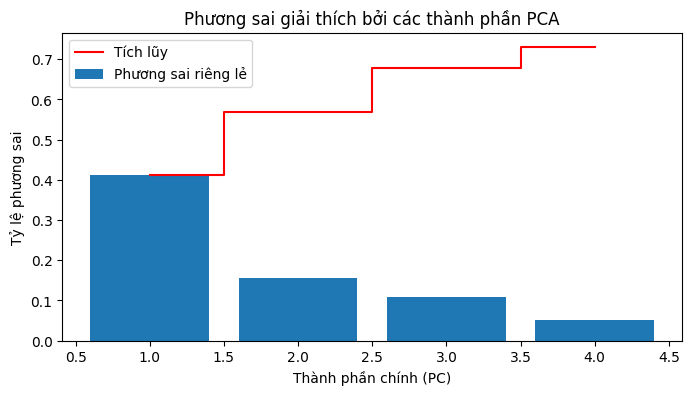

In [ ]:
data_path = 'processed_data/NSL_KDD_Train_Cleaned.csv'
n_components = 4
df = pd.read_csv(data_path)
X = df.drop('label', axis=1)
y = df['label']

# Khởi tạo PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X)

# --- TRỰC QUAN HÓA 1: Tỷ lệ phương sai tích lũy ---
plt.figure(figsize=(8, 4))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, label='Phương sai riêng lẻ')
plt.step(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red', label='Tích lũy')
plt.title('Phương sai giải thích bởi các thành phần PCA')
plt.xlabel('Thành phần chính (PC)')
plt.ylabel('Tỷ lệ phương sai')
plt.legend()
plt.show()

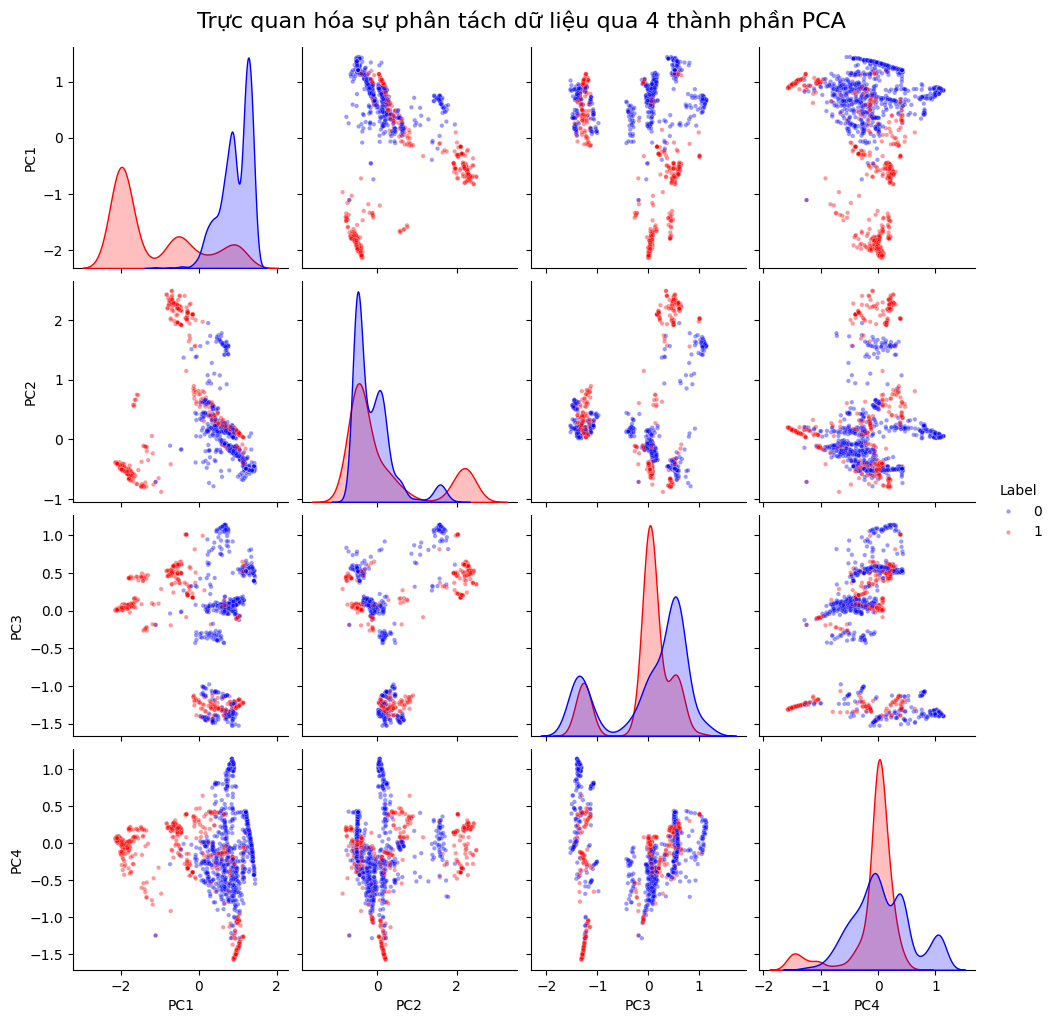

In [4]:
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)
pca_df['Label'] = y.values # Đảm bảo y là nhãn tương ứng (0: Normal, 1: Attack)

# 2. Vẽ Pairplot để xem mối quan hệ giữa cả 4 PCA
# Lưu ý: Vì tập dữ liệu NSL-KDD rất lớn, ta nên sample một phần để vẽ cho nhanh
grid = sns.pairplot(
    pca_df.sample(2000, random_state=42), # Lấy mẫu 2000 dòng để biểu đồ mượt mà
    hue='Label', 
    palette={0: 'blue', 1: 'red'},
    diag_kind='kde', # Vẽ biểu đồ phân phối ở đường chéo
    plot_kws={'alpha': 0.4, 's': 10} # Độ trong suốt và kích thước điểm
)

grid.fig.suptitle('Trực quan hóa sự phân tách dữ liệu qua 4 thành phần PCA', y=1.02, fontsize=16)
plt.show()

In [5]:
print("Shape of PCA result:", pca_result.shape)

Shape of PCA result: (125973, 4)


In [6]:
# Tính toán % phương sai được giữ lại
total_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"Tổng lượng thông tin (phương sai) được giữ lại: {total_variance:.2f}%")

# In chi tiết từng thành phần
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Thành phần chính {i+1} (PC{i+1}): {ratio*100:.2f}%")

Tổng lượng thông tin (phương sai) được giữ lại: 72.92%
Thành phần chính 1 (PC1): 41.25%
Thành phần chính 2 (PC2): 15.65%
Thành phần chính 3 (PC3): 10.94%
Thành phần chính 4 (PC4): 5.07%
